# Proyecto Estacaliente - Estadistica Computacional

### Grupo 10

Integrantes:
* Renato Ramirez 
* Matias Torrejon
* Benjamin Pavez
* Diego Cisternas

Consideraciones:
* Antes de subir el archivo a Github se le hizo una limpieza de los valores '?', de las columnas que no utilizaremos y de los juegos que no consideraremos.
* El criterio que utilizamos para seleccionar los juegos considerados fue a través de la cantidad de apariciones en el dataset, es decir, los que tenían mayor cantidad de registros.

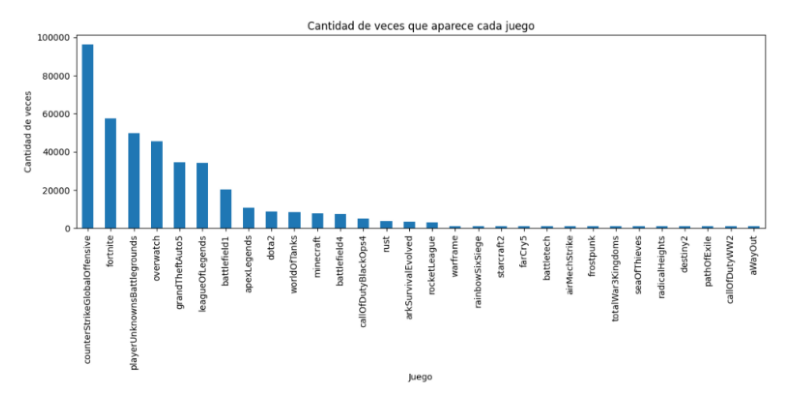

In [1]:
import matplotlib.pyplot as plt
import urllib
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns

url2 = 'https://github.com/BenjaminPavez/Estadistica-Computacional-INF280/blob/main/grafico1.png?raw=true'
img = np.array(Image.open(urllib.request.urlopen(url2)))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

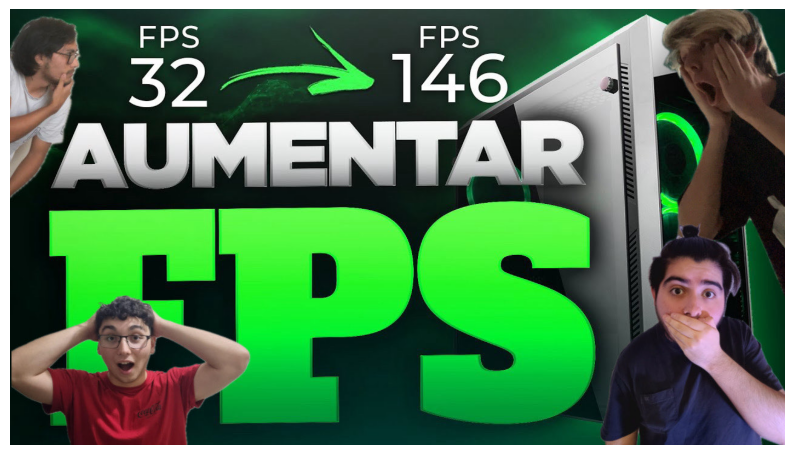

In [2]:
url = "https://github.com/BenjaminPavez/Estadistica-Computacional-INF280/blob/main/miniatura.jpg?raw=true"
img = np.array(Image.open(urllib.request.urlopen(url)))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## Entrega Proyecto 1

## Introducción

En la actualidad, el disfrute de los videojuegos en PC es una actividad ampliamente extendida, tanto de manera casual como dedicada. Sin embargo, para garantizar una experiencia de juego óptima, se requiere disponer de componentes de hardware capaces de ejecutar los juegos de manera fluida, permitiendo así disfrutar al máximo de las capacidades visuales y de rendimiento que estos ofrecen. En este sentido, dos de los componentes más críticos para lograr un buen desempeño son el procesador (CPU) y la tarjeta gráfica (GPU), cuya potencia determina en gran medida la calidad y fluidez de las imágenes generadas, expresada en el número de cuadros por segundo (FPS).

Dada la relevancia de estos componentes y su frecuente actualización para satisfacer las demandas de los videojuegos más exigentes, se busca estudiar qué juegos son más sensibles a los cambios en el hardware. Es decir, identificar aquellos en los que una mejora en CPU o GPU no resulta en una diferencia significativa en los FPS, así como aquellos cuyo rendimiento ya alcanza niveles óptimos y donde una mejora adicional carece de utilidad práctica. Este estudio tiene como objetivo discernir en qué juegos no justifica invertir un presupuesto adicional en la actualización de componentes, considerando que el límite de percepción visual del ojo humano y las limitaciones técnicas de los monitores pueden hacer que diferencias extremas en FPS no sean perceptibles ni aprovechables. 

**Variables principales:**

1.   GameName
2.   GpuName

**Variables secundarias:**

1.   CpuName
2.   CpuNumberOfCores
3.   CpuNumberOfThreads
4.   CpuFrequency
5.   GpuMemorySize
6.   GameResolution 
7.   GameSetting (low, med, high, max)
8.   FPS

## Pregunta
¿Cuáles juegos son más sensibles al tipo de hardware (CPU y GPU) utilizado?, A partir de esto, ¿en cuales no vale la pena invertir un mayor presupuesto para mejorar significativamente los FPS al jugar?


In [3]:
#Cargar archivo csv desde GitHub
url_archivo = 'https://raw.githubusercontent.com/BenjaminPavez/Estadistica-Computacional-INF280/main/Dataset/fps_videogamesv3.csv'

#Limpia valores con '?'
df = pd.read_csv(url_archivo, low_memory=False, na_values='?')
df = df.dropna()    

En esta situación, los valores atípicos representan de forma más válida la realidad, ya que el rendimiento de los juegos puede variar ampliamente debido a factores del mismo, tal como su resolución, gráficos y optimización, es por eso que eliminando valores atípicos estaríamos eliminando información importante, sobre todo para contestar la pregunta planteada, la cual requiere que se identifiquen juegos con casos extremos en los cuales existe una diferencia considerable de FPS, por lo que son necesarios para mantener la precisión del estudio.

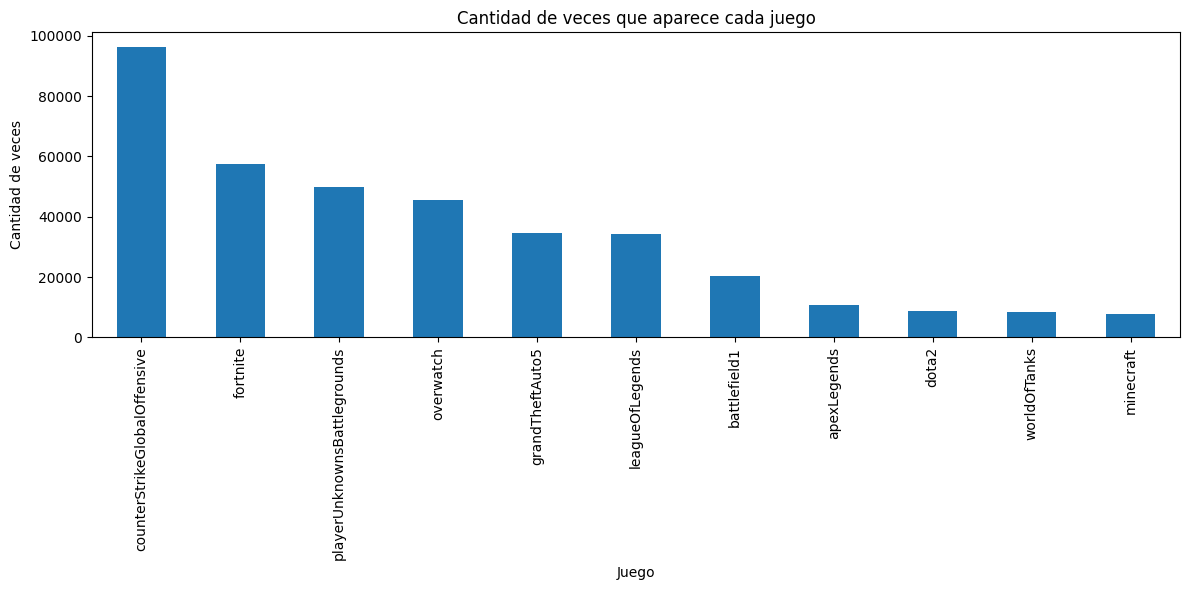

In [4]:
#Graficar la cantidad de veces que aparece cada juego
juegos_count = df['GameName'].value_counts()

plt.figure(figsize=(12, 6))
juegos_count.plot(kind='bar')
plt.xlabel('Juego')
plt.ylabel('Cantidad de veces')
plt.title('Cantidad de veces que aparece cada juego')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

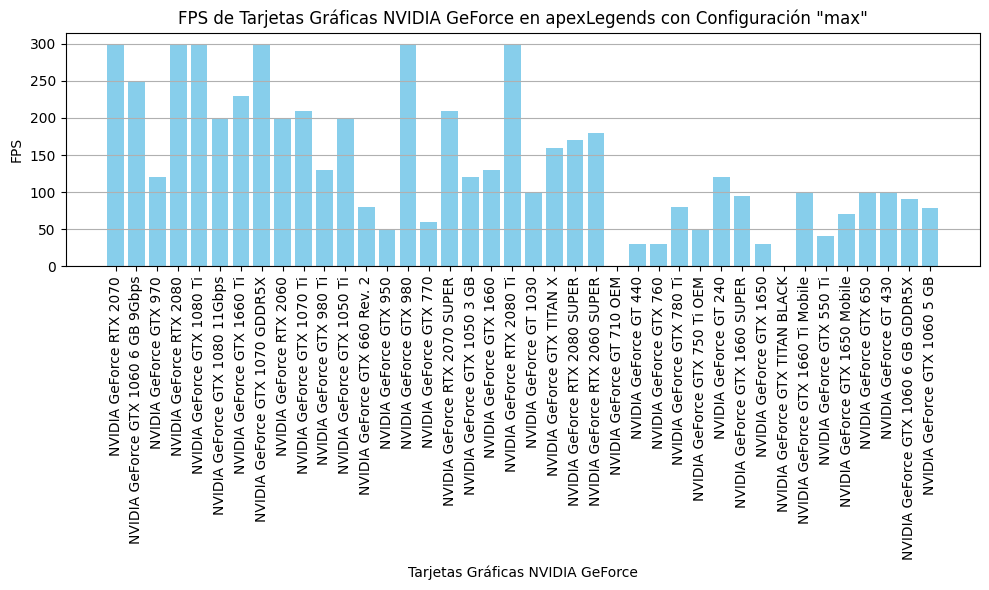

In [5]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_nvidia_rtx_max1 = df[(df['GpuName'].str.contains('NVIDIA GeForce', case=False)) & (df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
plt.bar(df_nvidia_rtx_max1['GpuName'], df_nvidia_rtx_max1['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas NVIDIA GeForce en apexLegends con Configuración "max"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

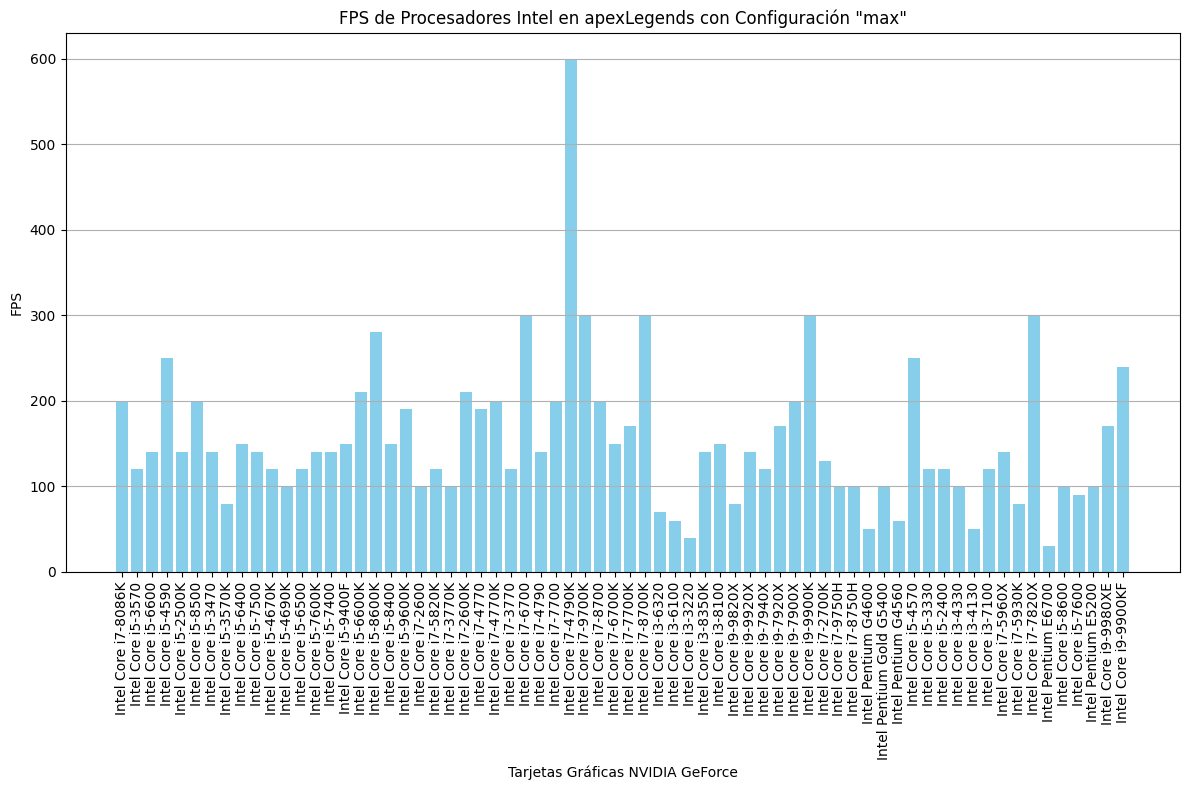

In [6]:
#Grafico de barras, Procesadores Intel en 'apexLegends' con Configuración 'max' vs FPS

df_nvidia_rtx_max = df[(df['CpuName'].str.contains('Intel', case=False)) & (df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(12, 8))
plt.bar(df_nvidia_rtx_max['CpuName'], df_nvidia_rtx_max['FPS'], color='skyblue')
plt.title('FPS de Procesadores Intel en apexLegends con Configuración "max"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

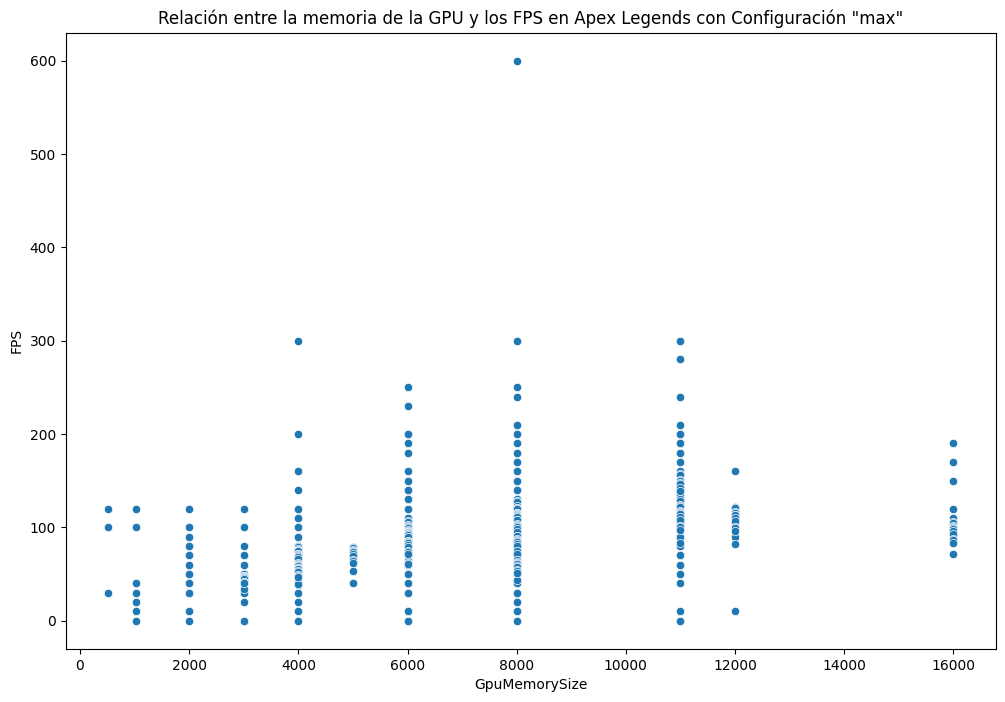

In [7]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_apex_legends = df[(df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='GpuMemorySize', y='FPS', data=df_apex_legends)
plt.title('Relación entre la memoria de la GPU y los FPS en Apex Legends con Configuración "max"')
plt.xlabel('GpuMemorySize')
plt.ylabel('FPS')
plt.show()

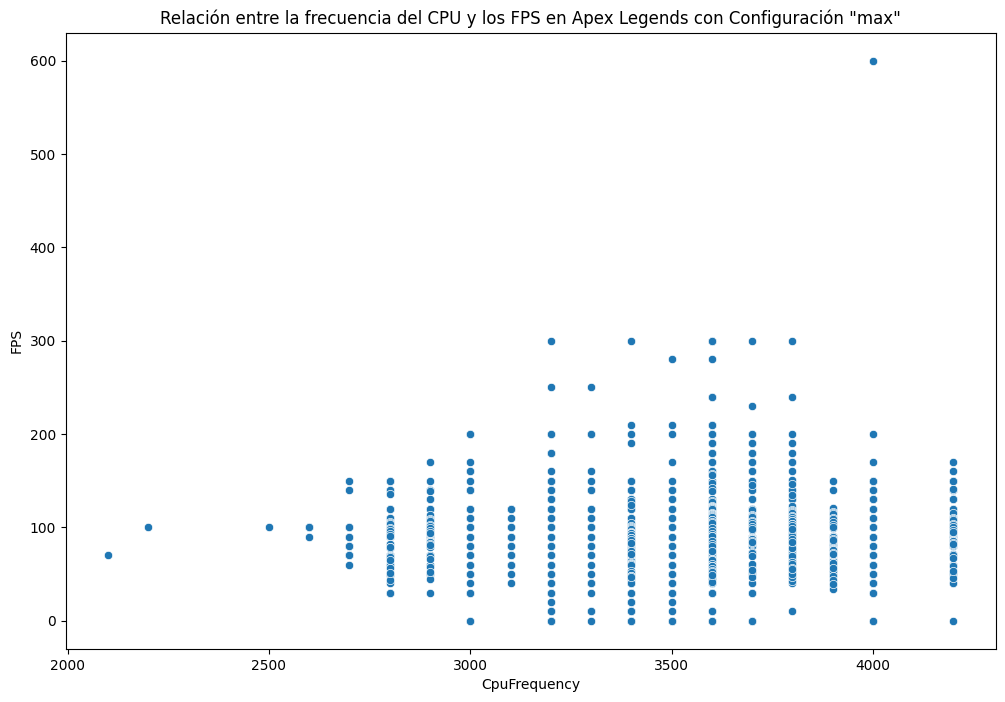

In [8]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_apex_legends = df[(df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='CpuFrequency', y='FPS', data=df_apex_legends)
plt.title('Relación entre la frecuencia del CPU y los FPS en Apex Legends con Configuración "max"')
plt.xlabel('CpuFrequency')
plt.ylabel('FPS')
plt.show()

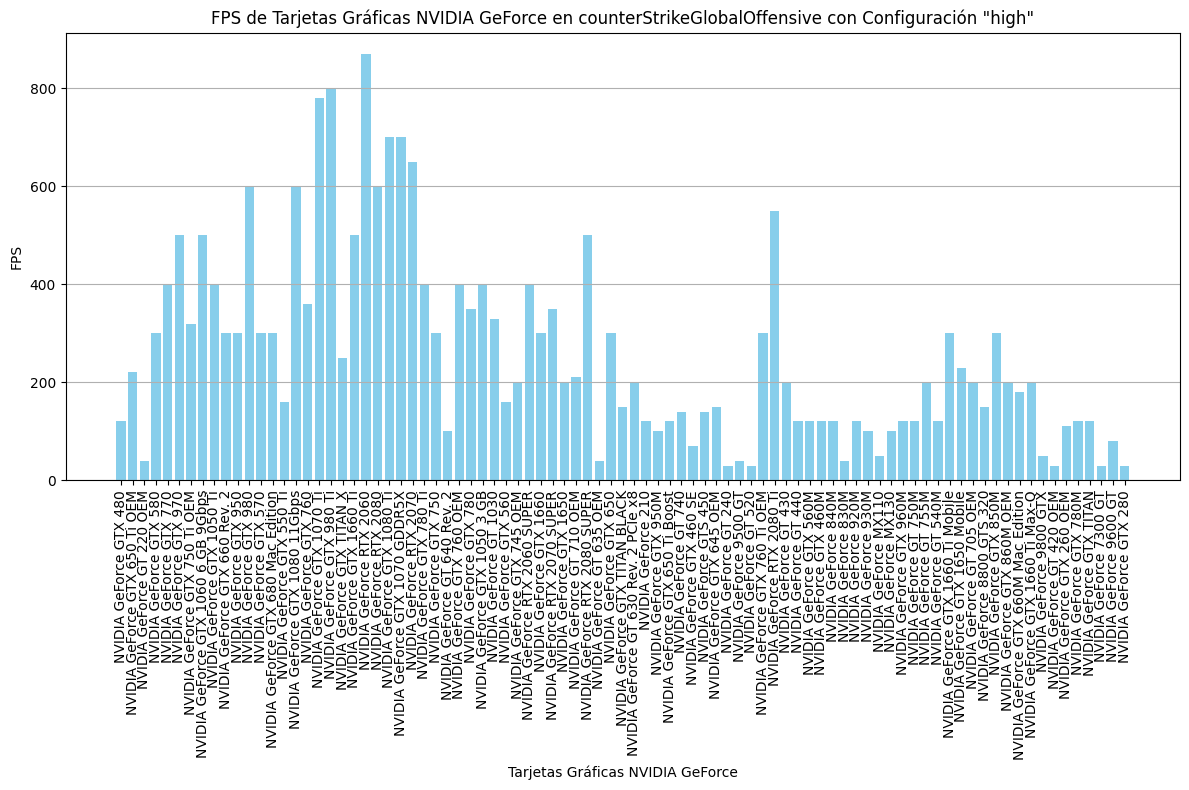

In [9]:
df_nvidia_high = df[(df['GpuName'].str.contains('NVIDIA GeForce', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'high')]

#Grafico de barras vs Graficas de NVIDIA en 'counterStrikeGlobalOffensive' con Configuración 'high' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_nvidia_high['GpuName'], df_nvidia_high['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas NVIDIA GeForce en counterStrikeGlobalOffensive con Configuración "high"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90)
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

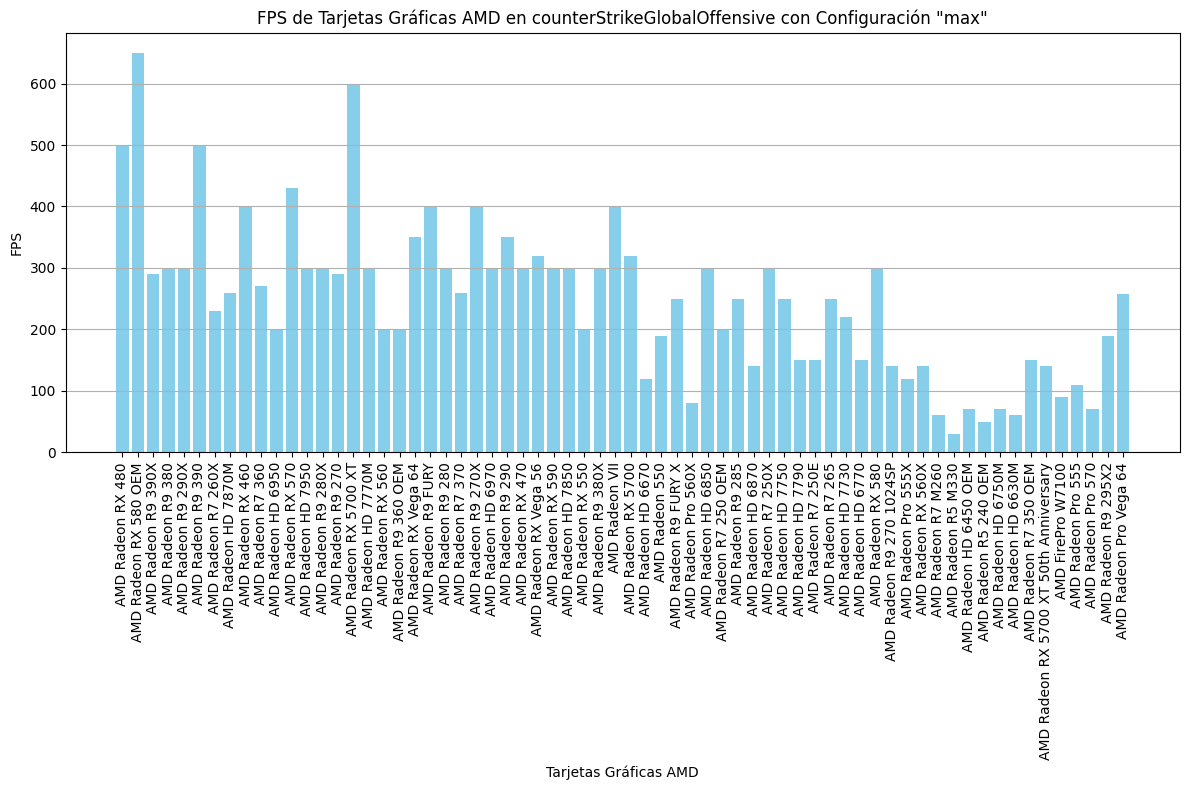

In [10]:
df_amd_max = df[(df['GpuName'].str.contains('AMD', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'max')]

#Grafico de barras vs Graficas de AMD en 'counterStrikeGlobalOffensive' con Configuración 'max' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_amd_max['GpuName'], df_amd_max['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas AMD en counterStrikeGlobalOffensive con Configuración "max"')
plt.xlabel('Tarjetas Gráficas AMD')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

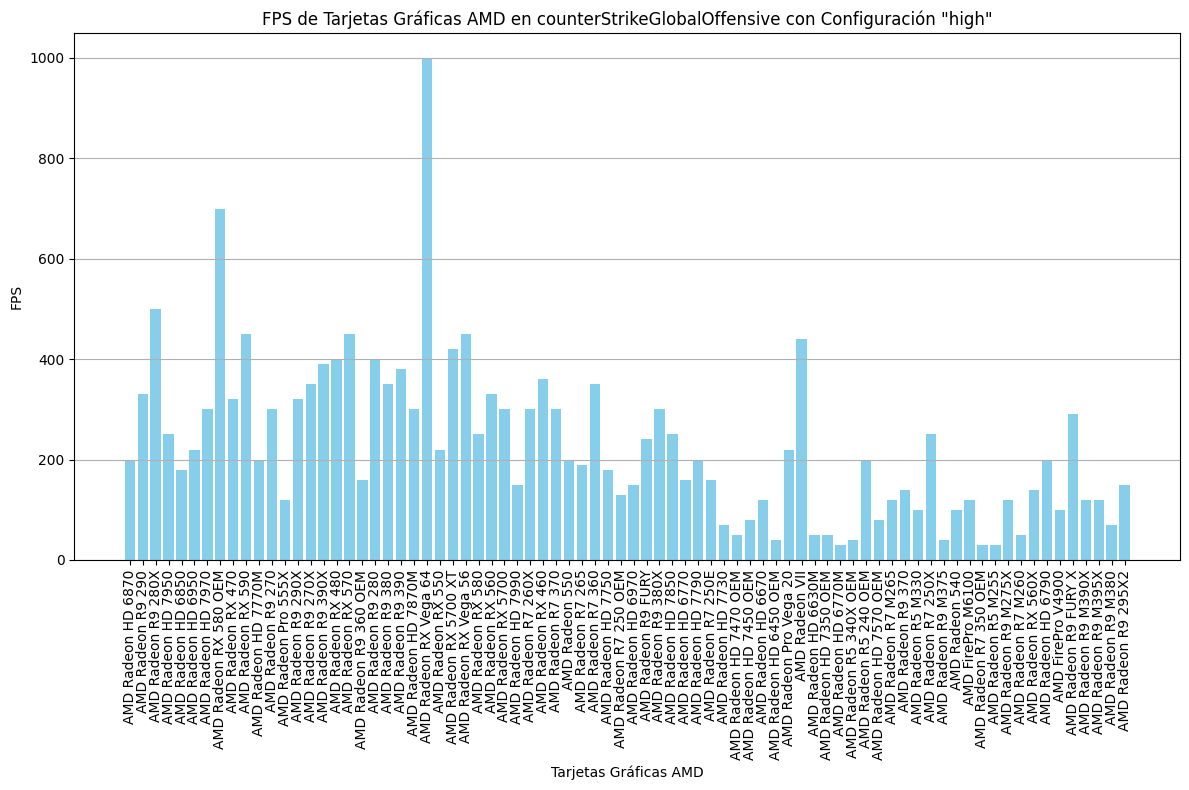

In [11]:
df_amd_high = df[(df['GpuName'].str.contains('AMD', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'high')]

#Grafico de barras vs Graficas de AMD en 'counterStrikeGlobalOffensive' con Configuración 'high' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_amd_high['GpuName'], df_amd_high['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas AMD en counterStrikeGlobalOffensive con Configuración "high"')
plt.xlabel('Tarjetas Gráficas AMD')
plt.ylabel('FPS')
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

## Entrega Proyecto 2

## Preámbulo del Modelamiento

En la presente entrega se detallan las variables que se utilizarán para realizar el modelamiento, con el fin de estudiar su comportamiento y su similitud con alguna distribución que fueron estudiadas en clases.

Debido a que es necesario que sean variables numéricas, no se pudo continuar con las variables principales que habiamos definido.

**Variables del modelamiento:**

1.   FPS
2.   CpuFrequency
*    Parámetro a considerar -> GameSetting se ajustara su valor en "max"


Primero veremos los histogramas de las variables, para tratar de decidir la distribución a utilizar. Como distribución tentativa será una normal.

En primera instancia usamos procesadores Intel para realizar el histograma.

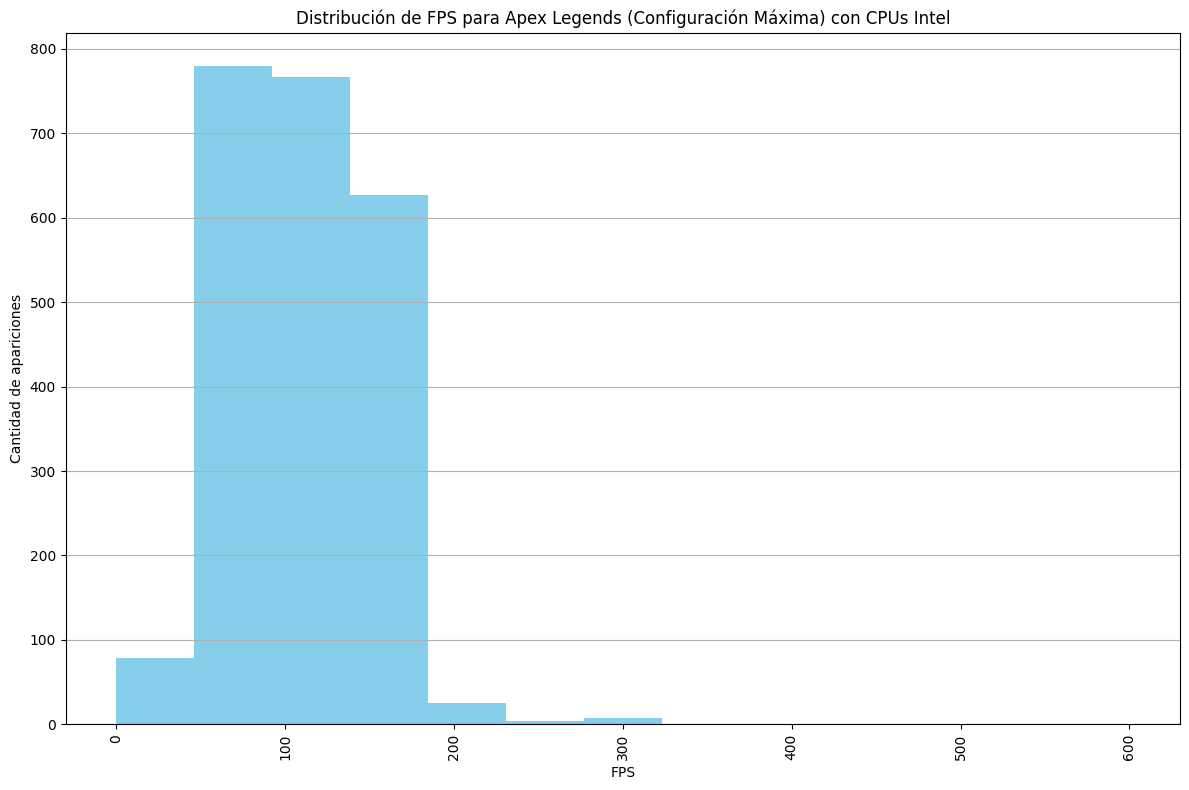

In [12]:
import scipy.stats as stats
from scipy.stats import norm, kstest, anderson, normaltest
from fitter import Fitter

#Filtrar el DataFrame según los criterios especificados
df_Intel1 = df[(df['CpuName'].str.contains('Intel', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

#Crear el histograma
plt.figure(figsize=(12, 8))
num_binsr1 = int(np.ceil(np.log2(len(df_Intel1['FPS'])) + 1))
plt.hist(df_Intel1['FPS'], bins=num_binsr1, color='skyblue')

#Añadir etiquetas y título
plt.xlabel('FPS')
plt.ylabel('Cantidad de apariciones')
plt.title('Distribución de FPS para Apex Legends (Configuración Máxima) con CPUs Intel')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ahora se realizara el mismo histograma pero con CPU AMD.

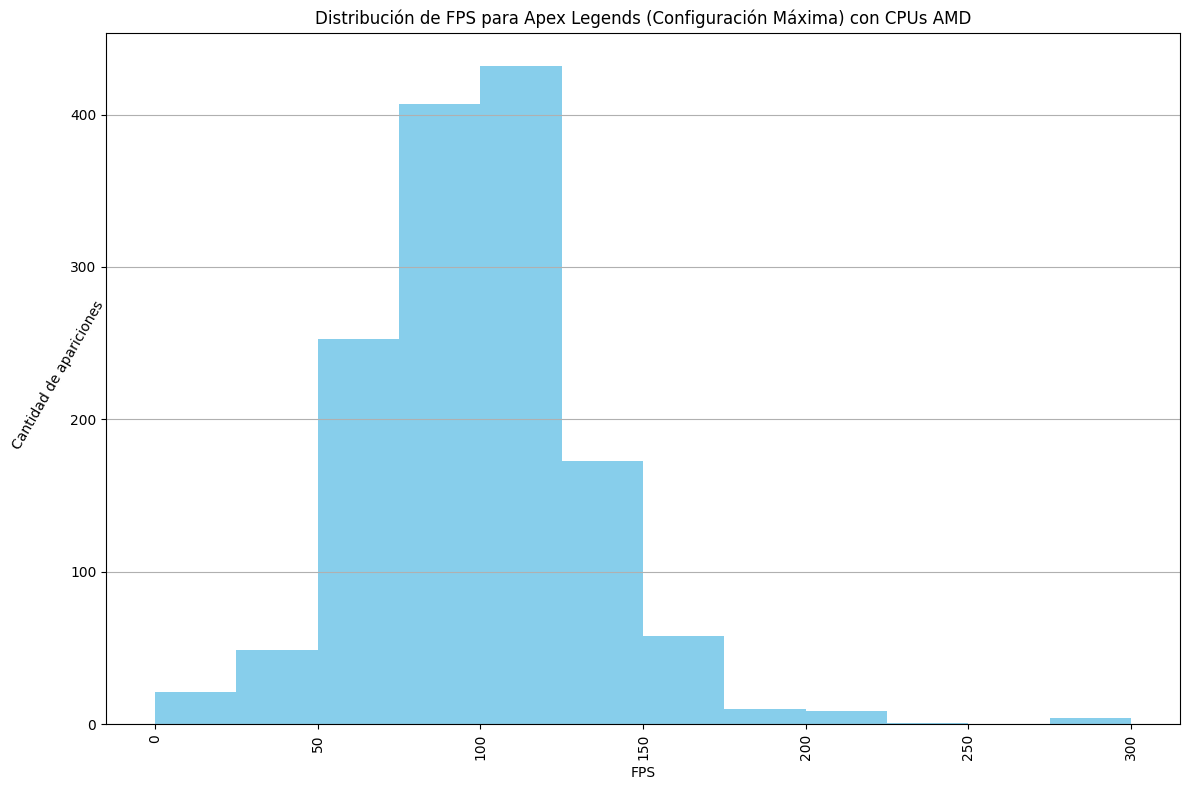

In [13]:
#Filtrar el DataFrame según los criterios especificados
df_amd1 = df[(df['CpuName'].str.contains('AMD', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

#Crear el histograma
plt.figure(figsize=(12, 8))
num_binsa1 = int(np.ceil(np.log2(len(df_amd1['FPS'])) + 1))
plt.hist(df_amd1['FPS'], bins=num_binsa1, color='skyblue')

#Añadir etiquetas y título
plt.xlabel('FPS')
plt.ylabel('Cantidad de apariciones', rotation=60)
plt.title('Distribución de FPS para Apex Legends (Configuración Máxima) con CPUs AMD')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Comparando ambos gráficos, podemos notar que cuando el procesador es AMD (df_amd1) se asemeja mucho más a una distribución normal y descartaremos el gráfico creado con procesador Intel. 

Realizaremos otros gráficos con la variable CpuFrequency, alternando entre Intel y AMD.

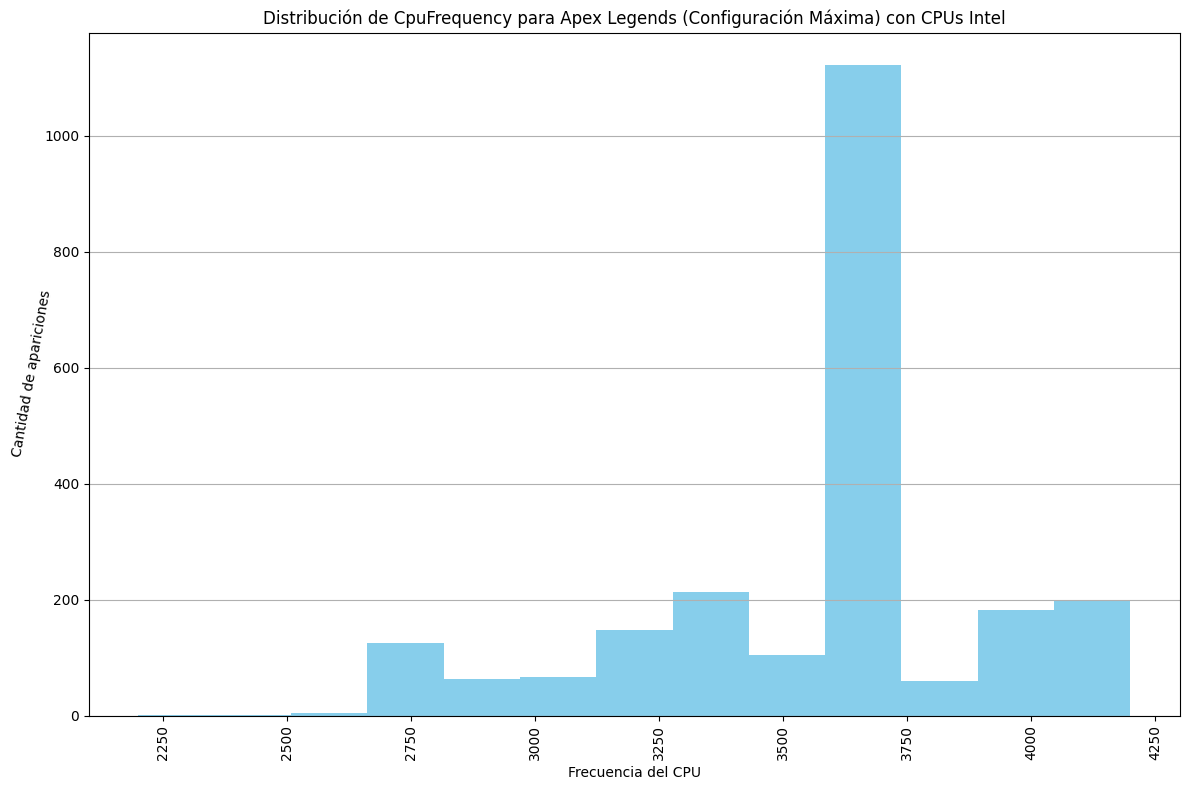

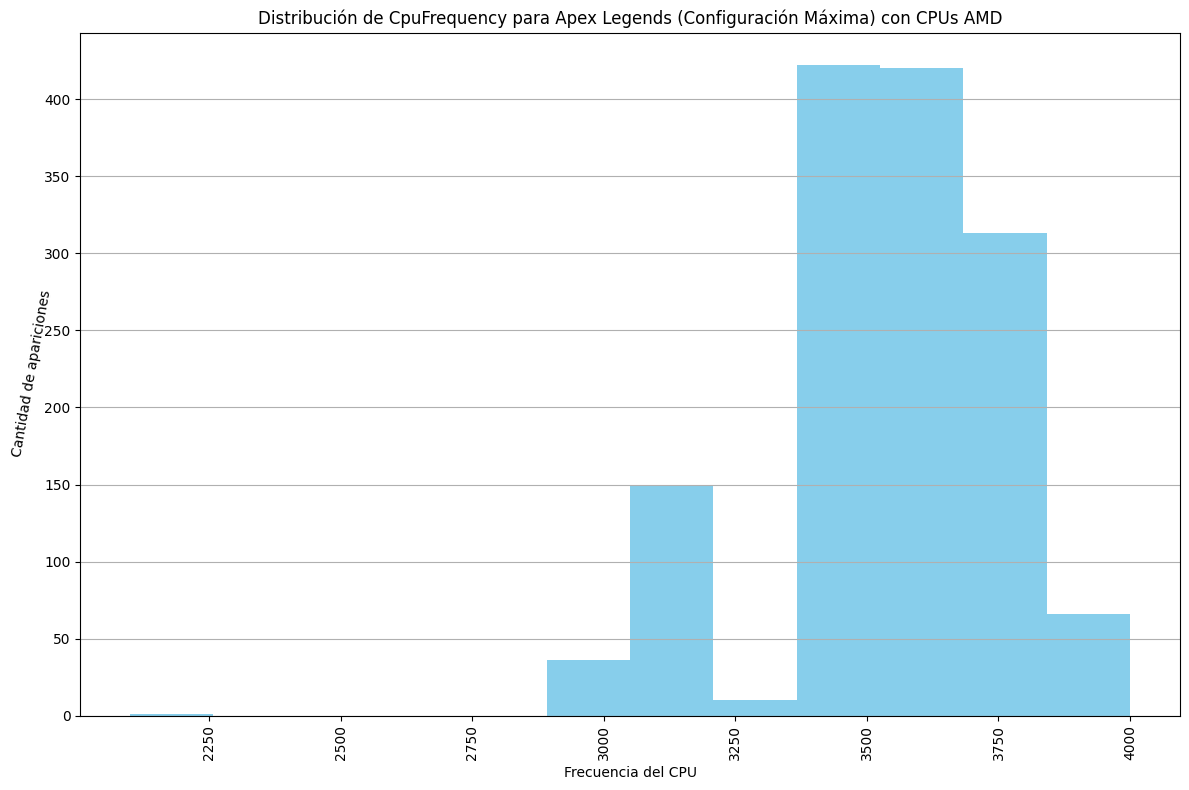

In [14]:
#Grafico para procesadores Intel en 'apexLegends' con Configuración 'max' vs FPS
df_intel3 = df[(df['CpuName'].str.contains('Intel', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]


plt.figure(figsize=(12, 8))
num_binsa3 = int(np.ceil(np.log2(len(df_intel3['CpuFrequency'])) + 1))
plt.hist(df_intel3['CpuFrequency'], bins=num_binsa3, color='skyblue')

#Añadir etiquetas y titulo
plt.xlabel('Frecuencia del CPU')
plt.ylabel('Cantidad de apariciones', rotation=80)
plt.title('Distribución de CpuFrequency para Apex Legends (Configuración Máxima) con CPUs Intel')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Grafico para la variable 'CpuFrequency' en 'apexLegends' con Configuración 'max' con CPUs AMD
df_amd2 = df[(df['CpuName'].str.contains('AMD', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]


plt.figure(figsize=(12, 8))
num_binsa2 = int(np.ceil(np.log2(len(df_amd2['CpuFrequency'])) + 1))
plt.hist(df_amd2['CpuFrequency'], bins=num_binsa2, color='skyblue')

#Añadir etiquetas y titulo
plt.xlabel('Frecuencia del CPU')
plt.ylabel('Cantidad de apariciones', rotation=80)
plt.title('Distribución de CpuFrequency para Apex Legends (Configuración Máxima) con CPUs AMD')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Podemos notar que el gráfico cuando el procesador es Intel, no se asemeja a una distribución normal por lo que utilizaremos el gráfico cuando el procesador es AMD (df_amd2).

Por lo que se realizarán las estimaciones con respecto a una distribucion normal para los dataframe
- df_amd1
- df_amd2

In [15]:
#Calcular la media y la desviación estándar de los datos
mean = np.mean(df_amd1['FPS'])
std_dev = np.std(df_amd1['FPS'])

mean1 = np.mean(df_amd2['CpuFrequency'])
std_dev1 = np.std(df_amd2['CpuFrequency'])

#Imprimir los resultados
print("Estimación por el método de los momentos \n")
print("Variable FPS ")
print("Media estimada:", mean)
print("Desviación estándar estimada:", std_dev)

print("")

print("Variable CpuFrequency ")
print("Media estimada:", mean1)
print("Desviación estándar estimada:", std_dev1)

Estimación por el método de los momentos 

Variable FPS 
Media estimada: 97.22215949188426
Desviación estándar estimada: 34.21365313478039

Variable CpuFrequency 
Media estimada: 3529.075511644319
Desviación estándar estimada: 210.69178812617892


In [16]:
#Ajustar la distribución normal a los datos y obtener los parámetros estimados
params = norm.fit(df_amd1['FPS'])
mu_ml, std_ml = params

#Imprimir los resultados
print("\nEstimación por el método de máxima verosimilitud \n")
print("Variable FPS ")
print("Media estimada (método de máxima verosimilitud):", mu_ml)
print("Desviación estándar estimada (método de máxima verosimilitud):", std_ml)

params = norm.fit(df_amd2['CpuFrequency'])
mu_ml1, std_ml1 = params
print("\nVariable CpuFrequency ")
print("Media estimada (método de máxima verosimilitud):", mu_ml1)
print("Desviación estándar estimada (método de máxima verosimilitud):", std_ml1)



Estimación por el método de máxima verosimilitud 

Variable FPS 
Media estimada (método de máxima verosimilitud): 97.22215949188426
Desviación estándar estimada (método de máxima verosimilitud): 34.21365313478039

Variable CpuFrequency 
Media estimada (método de máxima verosimilitud): 3529.075511644319
Desviación estándar estimada (método de máxima verosimilitud): 210.69178812617892


Podemos notar que ambas estimaciones entregaron valores identicos, por lo que utilizaremos los valores obtenidos por el método de máxima verosimilitud.

Ecuación correspondiente a una distribución normal

$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 } $

Reemplazando, obtenemos

* Para la variable FPS, $ \sigma = 34.21, \mu = 97.22 $

$ f(x) = \frac{1}{34.21 \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - 97.22}{34.21} \right)^2 } $

* Para la variable CpuFrequency, $ \sigma = 210.69, \mu = 3529.07 \space [MHz]$ 

$ f(x) = \frac{1}{210.69 \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - 3529.07}{210.69} \right)^2 } $


Con el resultado anterior se puede apreciar que el conjunto de datos con las variables escogidas para el modelamiento se asemeja bastante a una distribución normal, puesto que el error es igual a 0.005598, siendo el más pequeño de las otras distribuciones evaluadas.

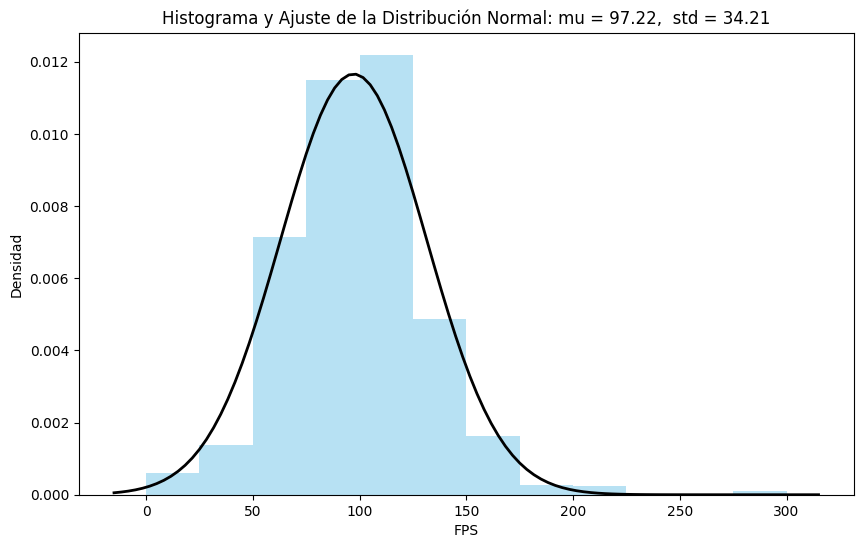

In [17]:
df_amd1 = df[(df['CpuName'].str.contains('AMD', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
num_binsamd1 = int(np.ceil(np.log2(len(df_amd1['FPS'])) + 1))
plt.hist(df_amd1['FPS'], bins=num_binsamd1, density=True, alpha=0.6, color='skyblue')

#Distribucion normal ajustada
mu, std = norm.fit(df_amd1['FPS'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

#Graficar la curva de densidad de la distribucion normal
plt.plot(x, p, 'k', linewidth=2)
title = "Histograma y Ajuste de la Distribución Normal: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('FPS')
plt.ylabel('Densidad')
plt.show()

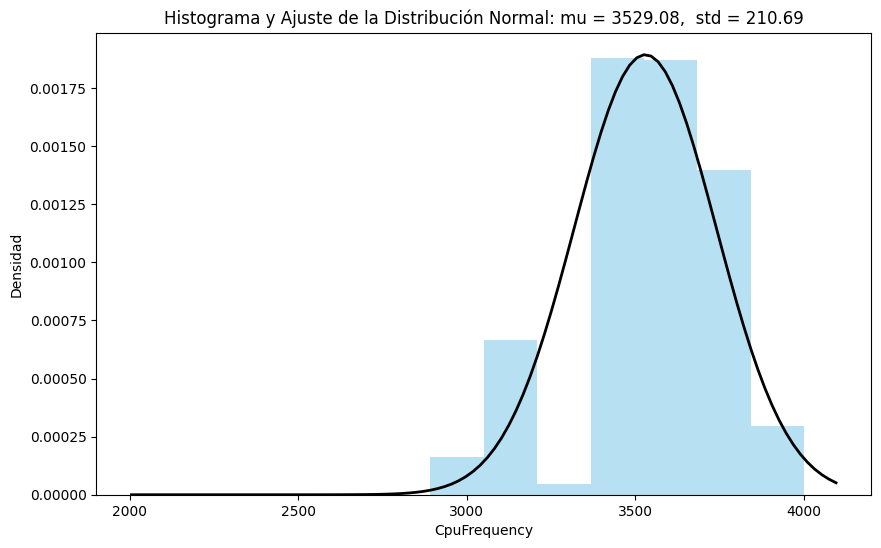

In [18]:
df_amd2 = df[(df['CpuName'].str.contains('AMD', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
num_binsamd2 = int(np.ceil(np.log2(len(df_amd2['CpuFrequency'])) + 1))
plt.hist(df_amd2['CpuFrequency'], bins=num_binsamd2, density=True, alpha=0.6, color='skyblue')

#Distribucion normal ajustada
mu, std = norm.fit(df_amd2['CpuFrequency'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

#Graficar la curva de densidad de la distribucion normal
plt.plot(x, p, 'k', linewidth=2)
title = "Histograma y Ajuste de la Distribución Normal: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('CpuFrequency')
plt.ylabel('Densidad')
plt.show()

Utilizando los siguientes gráficos podemos demostrar que la decisión tomada sobre la distribución a seguir es buena.

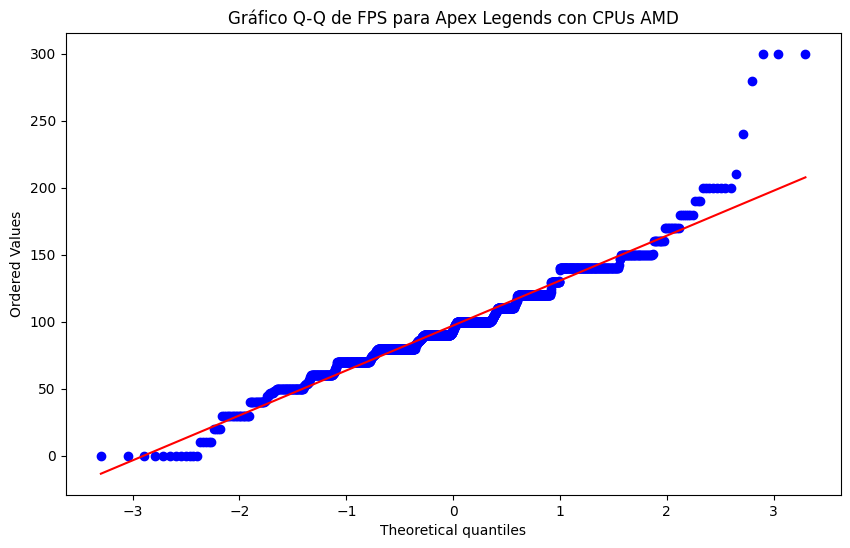

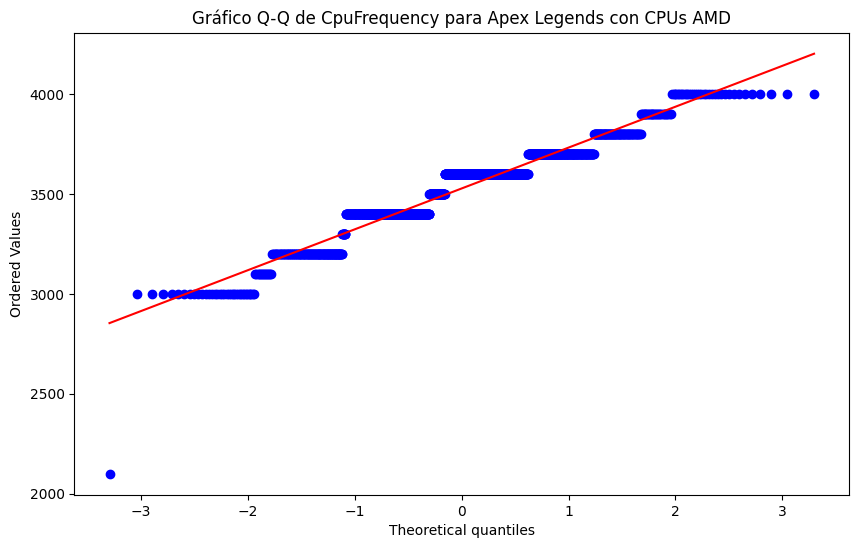

In [19]:
plt.figure(figsize=(10, 6))
stats.probplot(df_amd1['FPS'], dist="norm", plot=plt)

#Si la linea recta se ajusta a los puntos, entonces los datos siguen una distribucion normal
plt.title("Gráfico Q-Q de FPS para Apex Legends con CPUs AMD")
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(df_amd2['CpuFrequency'], dist="norm", plot=plt)

#Si la linea recta se ajusta a los puntos, entonces los datos siguen una distribucion normal
plt.title("Gráfico Q-Q de CpuFrequency para Apex Legends con CPUs AMD")
plt.show()

Preguntas

Variables se analizaron con procesador AMD, gráfica variable, juego ApexLegends en configuracion "max"

* ¿Qué suposiciones haces al usar cada método de estimación?

Para poder realizar todas estas estimaciones es totalmente fundamental asumir, primeramente, que las variables son independientes,
es decir, que la ocurrencia de una no afecta la probabilidad de que ocurra la otra, por otro lado,
es necesario que los datos sean identicamente distribuidos, en otras palabras, las variables siguen la
misma distribucion de probabilidad.

* ¿Cuáles son las limitaciones de los métodos de máxima verosimilitud y de los
momentos en la práctica?

El método de máxima verosimilitud puede verse afectado por datos atípicos, alterando los estimadores que se obtuvieron.
Tambien pueden sesgarse los estimadores si la muestra es pequeña, en nuestro caso al tener gran cantidad de valores la precisión es mejor.

El método de los momentos tambien es posible que se vea afectado por valores extremos, ademas es necesario recalcar que los estimadores
obtenidos por este método puede ser menos precisos a los obtenidos por máxima verosimilitud ya que los momentos muestrales quizas no capturen toda la información 
disponible en los datos.

* ¿Cómo podrías aplicar el modelo ajustado para hacer predicciones o inferencias
sobre una nueva muestra de datos?

Es posible aplicar el modelo ajustado para construir intervalos de confianza a una muestra generada con los parámetros estimados.

* ¿Qué implicaciones tienen los parámetros estimados en el contexto del problema?

Considerando que el juego en cuestión es un FPS competitivo, corriendo con configuración "max" para aprovechar al máximo la calidad de juego y la profundidad de mapa, es importante tener en cuenta que se necesita un rendimiento estable de FPS y que este sea alto (FPS>60) para tener una mejor experiencia de juego y sensación de fluidez.

Viendo ambos gráficos podemos analizar que si consideramos un procesador con CpuFrequency de 3500 MHz, se espera obtener una media de rendimiento de 100 FPS aproximadamente,
por lo que si estamos pensando en un cambio/mejora en el hardware, se deberá tener en consideración que componente será el que se mejore, ya que viendo que la desviación estandar es de 34 FPS,
podemos obtener un cambio considerable de FPS.

* ¿De qué forma se puede validar los resultados que no sea de forma gráfica?

Haciendo un 'fit' donde se obtienen valores como: error cuadrático medio, AIC y BIC, donde se deben considerar los más bajos, podemos ver que para ambas variables 
los más bajos se obtienen cuando la distribución es normal, por lo que podemos validar la decisión tomada al comienzo del trabajo realizado.

In [20]:
#Fit las distribuciones a los datos
f = Fitter(df_amd1['FPS'], distributions=['norm', 'expon', 'lognorm','gamma'])
f.fit()
f.summary(plot=False)

2024-06-26 21:20:15.462 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.005598)
2024-06-26 21:20:15.463 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.007607)
2024-06-26 21:20:15.527 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.008513)
2024-06-26 21:20:15.533 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.005572)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.005572,1620.677375,1636.446267,inf,0.083813,4.155698e-09
norm,0.005598,1772.920073,1783.432668,inf,0.101378,3.935629e-13
expon,0.007607,1227.971360,1238.483955,inf,0.373516,5.508716e-178
lognorm,0.008513,1977.912654,1993.681545,inf,0.515969,0.000000e+00


In [21]:
#Fit las distribuciones a los datos
f = Fitter(df_amd2['CpuFrequency'], distributions=['norm', 'expon', 'lognorm', 'gamma'])
f.fit()
f.summary(plot=False)

2024-06-26 21:20:15.560 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000452)
2024-06-26 21:20:15.562 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.000515)
2024-06-26 21:20:15.571 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000452)
2024-06-26 21:20:15.623 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000454)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000452,2452.515086,2463.027680,inf,0.195668,5.246099e-48
lognorm,0.000452,2454.522415,2470.291306,inf,0.195668,5.244818e-48
gamma,0.000454,3000.231869,3016.000761,inf,0.216714,6.664185e-59
expon,0.000515,1589.909690,1600.422285,inf,0.499458,0.000000e+00


## Bonus T5

### Enunciado:

Una nave espacial debe viajar periódicamente desde la *Vía Láctea* hasta la galaxia *M33*. Durante su viaje, la astronave encuentra *X* planetas con características similares a la Tierra. La probabilidad de que cualquiera de estos *X* planetas sea habitable por humanos es *p* = 0.2 independientemente de los demás. Si denotamos *Y* a la cantidad de planetas habitables encontrados y *X* sigue la siguiente f.d.p.

a) (35 %) Determine teórica y experimentalmente la f.d.p. conjunta de *X* e *Y*.

### Determinación teorica de la f.d.p. conjunta de X e Y:

### Datos:

La distribución de X es dada por:

| X | 0  | 1  | 2  | 3  |
| - |  - |  - |  - |  - |
|f(x)|0.1|0.2 | 0.3| 0.4|

- Probabilidad de que un planeta sea habitable: p = 0.2
- Distribución binomial condicional: $( Y \mid X=x \sim \text{Bin}(x, 0.2) )$

- $ P(Y=y \mid X=x) = \binom{x}{y} p^y (1-p)^{x-y} $

- $p = 0.2$
- $( 1 - p ) = 0.8 $

#### Usando:

$P(X = x, Y = y) = P(Y = y | X = x) \cdot P(X = x)$

### Para (X = 0):

$P(X = 0) = 0.1$

Y solo puede tomar valor 0 porque X = 0 significa que no se han encontrado planetas para ser habitables.

##### Entonces:

$P(X = 0, Y = 0) = P(Y = 0 | X = 0) \cdot P(X = 0) = 1 \cdot 0.1 = 0.1 $

### Para (X = 1):

$P(X = 1) = 0.2$

$Y = 0:$

$P(X = 1, Y = 0) = P(Y=0 \mid X=1) \cdot P(X = 1) = \binom{1}{0} (0.2)^0 (0.8)^1 \cdot 0.2 = 0.8 \cdot 0.2 = 0.16$

$Y = 1:$

$P(X = 1, Y = 1) = P(Y=1 \mid X=1) \cdot P(X = 1) = \binom{1}{1} (0.2)^1 (0.8)^0 \cdot 0.2 = 0.2 \cdot 0.2 = 0.04$

### Para (X = 2):

$P(X = 2) = 0.3$

$Y = 0:$

$P(X = 2, Y = 0) = P(Y=0 \mid X=2) \cdot P(X = 2) = \binom{2}{0} (0.2)^0 (0.8)^2 \cdot 0.3 = 0.64 \cdot 0.3 = 0.192$

$Y = 1:$

$P(X = 2, Y = 1) = P(Y=1 \mid X=2) \cdot P(X = 2) = \binom{2}{1} (0.2)^1 (0.8)^1 \cdot 0.3 = 0.32 \cdot 0.3 = 0.096$

$Y = 2:$

$P(X = 2, Y = 2) = P(Y=2 \mid X=2) \cdot P(X = 2) = \binom{2}{2} (0.2)^2 (0.8)^0 \cdot 0.3 = 0.04 \cdot 0.3 = 0.012$

### Para (X = 3):

$P(X = 3) = 0.4$

$Y = 0:$

$P(X = 3, Y = 0) = P(Y=0 \mid X=3) \cdot P(X = 3) = \binom{3}{0} (0.2)^0 (0.8)^3 \cdot 0.4 = 0.512 \cdot 0.4 = 0.205$

$Y = 1:$

$P(X = 3, Y = 1) = P(Y=1 \mid X=3) \cdot P(X = 3) = \binom{3}{1} (0.2)^1 (0.8)^2 \cdot 0.4 = 0.384 \cdot 0.4 = 0.1536$

$Y = 2:$

$P(X = 3, Y = 2) = P(Y=2 \mid X=3) \cdot P(X = 3) = \binom{3}{2} (0.2)^2 (0.8)^1 \cdot 0.4 = 0.096 \cdot 0.4 = 0.0384$

$Y = 3:$

$P(X = 3, Y = 3) = P(Y=3 \mid X=3) \cdot P(X = 3) = \binom{3}{3} (0.2)^3 (0.8)^0 \cdot 0.4 = 0.008 \cdot 0.4 = 0.0032$

## Tabla de la f.d.p conjunta:

| X\Y | 0     | 1     | 2     | 3     |
| --- | ----- | ----- | ----- | ----- |
| 0   | 0.1   | 0     | 0     | 0     |
| 1   | 0.16  | 0.04  | 0     | 0     |
| 2   | 0.192 | 0.096 | 0.012 | 0     |
| 3   | 0.205 | 0.1536| 0.0384| 0.0032|

Respuesta (Experimentalmente):

In [22]:
import random

#Poder reproducir los resultados
random.seed(10)

#Parametros
p = 0.2
x_vals = [0, 1, 2, 3]
f_x = [0.1, 0.2, 0.3, 0.4]
num_simulations = 100000

def simularXY():
    X = np.random.choice(x_vals, p=f_x)
    Y = np.random.binomial(X, p)
    return X, Y

#Simulaciones
datosSimulados = [simularXY() for _ in range(num_simulations)]
Xsim, Ysim = zip(*datosSimulados)

freq = np.zeros((len(x_vals), max(x_vals) + 1))
for x, y in datosSimulados:
    freq[x, y] += 1
freq /= num_simulations
print("f.d.p. conjunta experimental:")
print(freq)

f.d.p. conjunta experimental:
[[0.09939 0.      0.      0.     ]
 [0.16076 0.03997 0.      0.     ]
 [0.19235 0.09476 0.01209 0.     ]
 [0.20405 0.15606 0.0374  0.00317]]


b) (35 %) Determine teórica y experimentalmente la f.d.p. marginal de *Y* y su valor esperado.

Respuesta (teórica):

### F.d.p. marginal de  Y:

$ P(X = x, Y = y) = P(Y = y | X = x) \cdot P(X = x) $

### Datos:
- Probabilidad de que un planeta sea habitable: p = 0.2
- Distribución binomial condicional: $( Y \mid X=x \sim \text{Bin}(x, 0.2) )$

- $ P(Y=y \mid X=x) = \binom{x}{y} p^y (1-p)^{x-y} $

- p = 0.2
- ( 1 - p ) = 0.8 

Usando:
$ P(X = x, Y = y) = P(Y = y | X = x) \cdot P(X = x) $

### Para (X = 0):
P(X = 0) = 0.1

Y solo puede tomar valor 0 porque X = 0 significa que no se han encontrado planetas para ser habitables.

##### Entonces:

$ P(X = 0, Y = 0) = P(Y = 0 | X = 0) \cdot P(X = 0) = 1 \cdot 0.1 = 0.1 $

### Para (X = 1):

P(X = 1) = 0.2

Y = 0:

$ P(X = 1, Y = 0) = P(Y=0 \mid X=1) \cdot P(X = 1) = \binom{1}{0} (0.2)^0 (0.8)^1 \cdot 0.2 = 0.8 \cdot 0.2 = 0.16 $

Y = 1:

$ P(X = 1, Y = 1) = P(Y=1 \mid X=1) \cdot P(X = 1) = \binom{1}{1} (0.2)^1 (0.8)^0 \cdot 0.2 = 0.2 \cdot 0.2 = 0.04 $

### Para (X = 2):
P(X = 2) = 0.3

Y = 0:

$ P(X = 2, Y = 0) = P(Y=0 \mid X=2) \cdot P(X = 2) = \binom{2}{0} (0.2)^0 (0.8)^2 \cdot 0.3 = 0.64 \cdot 0.3 = 0.192 $

Y = 1

$ P(X = 2, Y = 1) = P(Y=1 \mid X=2) \cdot P(X = 2) = \binom{2}{1} (0.2)^1 (0.8)^1 \cdot 0.3 = 0.32 \cdot 0.3 = 0.096 $

Y = 2

$ P(X = 2, Y = 2) = P(Y=2 \mid X=2) \cdot P(X = 2) = \binom{2}{2} (0.2)^2 (0.8)^0 \cdot 0.3 = 0.04 \cdot 0.3 = 0.012 $

### Para (X = 3):

P(X = 3) = 0.4

Y = 0:

$ P(X = 3, Y = 0) = P(Y=0 \mid X=3) \cdot P(X = 3) = \binom{3}{0} (0.2)^0 (0.8)^3 \cdot 0.4 = 0.512 \cdot 0.4 = 0.205 $

Y = 1

$ P(X = 3, Y = 1) = P(Y=1 \mid X=3) \cdot P(X = 3) = \binom{3}{1} (0.2)^1 (0.8)^2 \cdot 0.4 = 0.384 \cdot 0.4 = 0.1536 $

Y = 2

$ P(X = 3, Y = 2) = P(Y=2 \mid X=3) \cdot P(X = 3) = \binom{3}{2} (0.2)^2 (0.8)^1 \cdot 0.4 = 0.096 \cdot 0.4 = 0.0384 $

Y = 3

$ P(X = 3, Y = 3) = P(Y=3 \mid X=3) \cdot P(X = 3) = \binom{3}{3} (0.2)^3 (0.8)^0 \cdot 0.4 = 0.008 \cdot 0.4 = 0.0032 $
##### Entonces:

#### Para Y = 0:
P(0, 0) + P(1, 0) + P(2, 0) + P(3, 0) =
0.1 + 0.16 + 0.192 + 0.205 = 0.657

#### Para Y = 1:
P(0, 1) + P(1, 1) + P(2, 1) + P(3, 1) =
0 + 0.04 + 0.096 + 0.1536 = 0.2896

#### Para Y = 2:
P(0, 2) + P(1, 2) + P(2, 2) + P(3, 2) =
0 + 0 + 0.012 + 0.0384 = 0.0504

#### Para Y = 3:
P(0, 3) + P(1, 3) + P(2, 3) + P(3, 3) =
0 + 0 + 0 + 0.0032 = 0.0032

##### Confirmación de cálculos:
0.657 + 0.2896 + 0.0504 + 0.0032 ≈ 1

### Tabla de f.d.p marginal de Y:
| Y | 0  | 1  | 2  | 3  |
| - |  - |  - |  - |  - |
|f(y)|0.657|0.2896 | 0.0504| 0.0032|

### Valor esperado de Y:
$ E(Y) = \sum_{y=0}^3 y \cdot P(Y=y) = 0 \cdot 0.657 + 1 \cdot 0.2896 + 2 \cdot 0.0504 + 3 \cdot 0.0032 = 0.3976 $

In [23]:
#Respuesta (Experimentalmente)

#Obtener la marginal de Y
marginal_Y = np.sum(freq, axis=0)
print("f.d.p. marginal experimental de Y:", marginal_Y)

#Valor esperado de Y
esperado_Y = np.sum([y * marginal_Y[y] for y in range(len(marginal_Y))])
print("Valor esperado experimental de Y:", esperado_Y)

f.d.p. marginal experimental de Y: [0.65655 0.29079 0.04949 0.00317]
Valor esperado experimental de Y: 0.39928


c) (30 %) Determine teórica y experimentalmente la f.d.p. condicional de *X* al valor *Y* = 1. Determine
además E(*X*|*Y* = 1).

##### Determinación teorica de la f.d.p condicional X $\mid$ Y = 1 y su valor esperado:

#### Datos:

Cálculo de la f.d.p. condicional $X \mid Y = 1$ es dada por:

$f{(X \mid Y=1)}(X) = \frac{f{X,Y}(X,1)}{P(Y=1)}$

Luego, usando los valores de la tabla de la f.d.p conjunta y $P(Y = 1) = 0 + 0.04 + 0.096 + 0.1536 = 0.2896:$

$\frac{P(0, 1)}{0.2896} = \frac{0}{0.2896} = 0$

$\frac{P(1, 1)}{0.2896} = \frac{0.04}{0.2896} = 0.1381$

$\frac{P(2, 1)}{0.2896} = \frac{0.096}{0.2896} = 0.3315$

$\frac{P(3, 1)}{0.2896} = \frac{0.1536}{0.2896} = 0.5304$

| X | 0  | 1  | 2  | 3  |
| - |  - |  - |  - |  - |
|$f{(X \mid Y=1)}(X)$|0|0.1381 | 0.3315| 0.5304|

Valor esperado de ($X \mid Y = 1$):

$E(X \mid Y=1) = \sum_{x=0}^{3} x \cdot f_{X \mid Y=1}(x) = 0 \cdot 0 + 1 \cdot 0.1381 + 2 \cdot 0.3315 + 3 \cdot 0.5304 = 2.392$

Respuesta (Experimentalmente):

In [24]:
condicional_X_dado_Y1 = freq[:, 1] / marginal_Y[1]

#Mostrar los resultados para cada valor posible de X
print("f.d.p. condicional experimental de X dado Y = 1:")
for x_value, prob in zip(x_vals, condicional_X_dado_Y1):
    print(f"P(X = {x_value} | Y = 1) = {prob:.4f}")

#Valor esperado de X dado Y = 1
esperado_X_dado_Y1 = np.sum([x * condicional_X_dado_Y1[x] for x in range(len(condicional_X_dado_Y1))])
print("Valor esperado experimental de X dado Y = 1:", esperado_X_dado_Y1)

f.d.p. condicional experimental de X dado Y = 1:
P(X = 0 | Y = 1) = 0.0000
P(X = 1 | Y = 1) = 0.1375
P(X = 2 | Y = 1) = 0.3259
P(X = 3 | Y = 1) = 0.5367
Valor esperado experimental de X dado Y = 1: 2.3992228068365486


## Entrega Proyecto 3

Para esta entrega se seguiran utilizando los mismos parametros, es decir, utilizaremos las variables de FPS (utilizando las gráficas de Intel) y la variable CPUfrequency (con los procesadores AMD), ademas seguiremos haciendo uso del juego Apex para el analisis, con una configuración de gráficos "max".


### Valor esperado y desviación estandar obtenida para la variable FPS en la entrega anterior:

Dado que, los valores obtenidos de valor esperado y desviación estandar son iguales para ambos momentos, realizaremos solo un procedimiento para esta variable.
 
$ \mu = 97.22 $

$ \sigma = 34.21 $


De esta forma, tenemos que:

$ Var(X) = (34.21)^2 = 1170.32 $ 

Para los siguientes calculos se tomaran en cuenta que estaran bajo las siguiente suposiciones: 

1.- Tal como vimos en la entrega pasada, los datos seguiran una distrbución normal, poder obtener los intervalos de confianza.

2.- La muestra seran independientes y seguiran la misma distribución (IID).


Nos encontramos frente a un caso de un intervalo de confianza para la media con varianza desconocia y un intervalo de confianza para la varianza con media desconocida. Utilizamos la distribución t para el IC de la media y la distribución chi-cuadrado para el IC de la varianza.

Si consideramos un $\alpha$ de 0.96 los valores obtenidos para $E(X)$ y $Var(x)$ siguen perteneciendo al IC obtenido.

* Intervalo de Confianza para la media de FPS ($\alpha$ -> 0.96) = $(95.66, 98.78)$
* Intervalo de Confianza para la varianza de FPS ($\alpha$ -> 0.96) = $(1169.75, 1174.16)$

In [25]:
from scipy.stats import t, chi2

col_fps = "FPS"
data_fps = df_amd1[col_fps]

media_muestral_fps = 97.22
varianza_muestral_fps = 1170.32
n = len(data_fps)

#Nivel de significancia
significancia = 0.05

#Valor crítico de t (percentil)
t_critical = t.ppf(1 - (significancia) / 2, len(data_fps) - 1)

#Error estándar de la media
error_est = varianza_muestral_fps / np.sqrt(n)

#Intervalo de confianza
ic_low = media_muestral_fps - t_critical * error_est
ic_high = media_muestral_fps + t_critical * error_est

print(f"Intervalo de Confianza para la media de FPS: ({ic_low:.2f}, {ic_high:.2f})")

chi2_lower = chi2.ppf((significancia / 2), n - 1)
chi2_upper = chi2.ppf((1 - significancia / 2), n - 1)

#Intervalo de confianza
ic_var_low = ((n - 1) * varianza_muestral_fps) / chi2_upper
ic_var_high = ((n - 1) * varianza_muestral_fps) / chi2_lower

print(f"Intervalo de Confianza para la varianza de FPS: ({ic_var_low:.2f}, {ic_var_high:.2f})")

Intervalo de Confianza para la media de FPS: (36.23, 158.21)
Intervalo de Confianza para la varianza de FPS: (1088.68, 1261.55)


### Valor esperado y desviación estandar obtenida para la variable CpuFrequency en la entrega anterior:
Dado que, los valores obtenidos de valor esperado y desviación estandar son iguales para ambos momentos, realizaremos solo un procedimiento para esta variable.
 
$ \mu = 3529.08 $

$ \sigma = 210.69 $


De esta forma, tenemos que:

$ Var(X) = (210.69)^2 = 44422.4 $

Nos encontramos frente a un caso de un intervalo de confianza para la media con varianza desconocia y un intervalo de confianza para la varianza con media desconocida. Utilizamos la distribución t para el IC de la media y la distribución chi-cuadrado para el IC de la varianza.

Si consideramos un $\alpha$ de 0.99 los valores obtenidos para $E(X)$ y $Var(x)$ siguen perteneciendo al IC obtenido.

* Intervalo de Confianza para la media de CpuFrequency ($\alpha$ -> 0.99): $(3500.24, 3557.90)$
* Intervalo de Confianza para la varianza de CpuFrequency ($\alpha$ -> 0.99): $(44370.40, 44452.01)$

In [26]:
from scipy.stats import t, chi2

col_cpuf = "CpuFrequency"
data_cpuf = df_amd1[col_cpuf]

varianza_muestral_cpu = 210.69**2
media_muestral_cpu = 3529.07

n = len(data_cpuf)

#Nivel de significancia
sign = 0.0505

#Valor crítico de t (percentil)
t_critical = t.ppf(1 - (sign) / 2, len(data_cpuf) - 1)

#Error estándar de la media
error_est = varianza_muestral_fps / np.sqrt(n)

#Intervalo de confianza
ic_low = media_muestral_cpu - t_critical * error_est
ic_high = media_muestral_cpu + t_critical * error_est

print(f"Intervalo de Confianza para la media de CpuFrequency: ({ic_low:.2f}, {ic_high:.2f})")

chi2_lower = chi2.ppf((sign / 2), n - 1)
chi2_upper = chi2.ppf((1 - sign / 2), n - 1)

#Intervalo de confianza
ic_var_low = ((n - 1) * varianza_muestral_fps) / chi2_upper
ic_var_high = ((n - 1) * varianza_muestral_fps) / chi2_lower

print(f"Intervalo de Confianza para la varianza de CpuFrequency: ({ic_var_low:.2f}, {ic_var_high:.2f})")

Intervalo de Confianza para la media de CpuFrequency: (3468.22, 3589.92)
Intervalo de Confianza para la varianza de CpuFrequency: (1088.85, 1261.34)


## Prueba de bondad

In [36]:
ks_stat_fps, ks_value_fps = kstest(data_fps, "norm", args=(media_muestral_fps, varianza_muestral_fps))
ks_stat_cpu, ks_value_cpu = kstest(data_cpuf, "norm", args=(media_muestral_cpu, varianza_muestral_cpu))

print("Kolmogorov-Smirnof test para variable FPS:\n")
print(f"Estadistico KS-FPS: {ks_stat_fps:}, valor p: {ks_value_fps:}\n\n")

print("Kolmogorov-Smirnof test para variable CpuFrequency:\n")
print(f"Estadistico KS-CPUF: {ks_stat_cpu:}, valor p: {ks_value_cpu:}")


#Número de bins
num_bins = 38

frecuencia_fps, limit_bins = np.histogram(data_fps, bins=num_bins)

#Calcular las frecuencias esperadas
frec_esp = []
for i in range(len(limit_bins) - 1):
    prob = stats.norm.cdf(limit_bins[i + 1], loc=media_muestral_fps, scale=np.sqrt(varianza_muestral_fps)) - \
           stats.norm.cdf(limit_bins[i], loc=media_muestral_fps, scale=np.sqrt(varianza_muestral_fps))
    frec_esp.append(prob * len(data_fps))


frec_esp = np.array(frec_esp)
frecuencia_fps = frecuencia_fps.astype(float)
frec_esp = frec_esp.astype(float)
frec_esp *= np.sum(frecuencia_fps) / np.sum(frec_esp)
chi2_stat_fps, valor_p_fps = stats.chisquare(f_obs=frecuencia_fps, f_exp=frec_esp)

print("Test de Chi-cuadrado para FPS:")
print(f"Estadístico Chi-cuadrado: {chi2_stat_fps}")
print(f"Valor p: {valor_p_fps}")


Kolmogorov-Smirnof test para variable FPS:

Estadistico KS-FPS: 0.46689742441204063, valor p: 1.2914718681763094e-283


Kolmogorov-Smirnof test para variable CpuFrequency:

Estadistico KS-CPUF: 0.49576775860520705, valor p: 3.36e-322
11.268512522504125 [0.574 0.654 0.785 0.915 1.089] [15.  10.   5.   2.5  1. ]
Valores criticos:

Test de Chi-cuadrado para FPS:
Estadístico Chi-cuadrado: 1399715.7772988908
Valor p: 0.0


A partir de los tests y del valor p que ambos entregaron, hay evidencia suficiente para rechazar la hipotesis nula (p $\le$ 0,05)

### Prueba de Hipótesis para la Media de FPS

- En este estudio, se considerarán la hipótesis basadas en la variable FPS, ya que es una de las principales variables afectadas por el hardware y ha sido el foco de nuestro estudio hasta el momento.

#### 1. Definición de la Hipótesis:

- **Hipótesis nula $ H_0 $**: La media de FPS $\mu$ es igual a 100.

  $H_0: \mu = 100$

- **Hipótesis alternativa $ H_1 $**: La media de FPS $\mu$ es diferente de 100.

  $H_1: \mu \neq 100$

#### 2. Nivel de Significancia:

- Se utiliza un nivel de significancia $\alpha$ de 0.05.

#### 3. Supuestos:

- La muestra de FPS para Procesadores AMD en ApexLegens con un GameSetting en max son Independiente e Identicamente Distribuidas (IID)

- Por el Teorema de Limite Central, la variable converge a una Distribucion Normal

- **Se asume para el test que la varianza es desconocida**

#### 4. Cálculo del Estadístico de Prueba:

Para realizar el test, se usara la fórmula del estadístico $t$ para media con varianza desconocida.

$t = \frac{\bar{x} - \mu_0}{S_x / \sqrt{n}}$

donde:
- $\bar{x}$ es la media muestral.
- $\mu_0$ es la media bajo la hipótesis nula (100 en este caso).
- $S_x$ es la desviacion estandar de la muestra de FPS.
- $n$ es el tamaño de la muestra.


#### 5. Determinación del Valor Crítico:

Para un nivel de significancia de 0.05 y una prueba bilateral, consultamos la tabla de distribución $t$ de Student para $n - 1 $ grados de libertad.


### Resultados de la Ejecución del Código:


In [37]:

mean_FPS = df_amd1['FPS'].mean()
std_dev_FPS = df_amd1['FPS'].std()  
n_FPS = len(df_amd1['FPS'])  

mu_0 = 100

t_estadistico = (mean_FPS - mu_0) / (std_dev_FPS / np.sqrt(n_FPS))

alpha = 0.05
df = n_FPS - 1
t_critico = t.ppf(1 - alpha/2, df)


if abs(t_estadistico) > t_critico:
    decision = "Rechazar la hipótesis nula"
else:
    decision = "No rechazar la hipótesis nula"

print("Estadistico t:", t_estadistico)
print("Valor critico t:", t_critico)
print("Decision:", decision)


Estadistico t: -3.0551988742365905
Valor critico t: 1.9616407259210875
Decision: Rechazar la hipótesis nula


#### Resultados:

- **Estadístico $ t $**: -3.0551988742365905
- **Valor Crítico**: 1.9616407259210875
- **Decisión**: Rechazar la hipótesis nula

#### Conclusión:

- Con un nivel de significancia de 5%, se rechaza $H_0$, es decir, la evidencia señala que es improblable que la media de FPS sea menor a 100 FPS

#### Regresion Lineal

In [29]:
import statsmodels.api as sm

X = df_amd1['CpuFrequency']
y = df_amd1['FPS']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    FPS   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     34.73
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           4.72e-09
Time:                        21:20:17   Log-Likelihood:                -6999.2
No. Observations:                1417   AIC:                         1.400e+04
Df Residuals:                    1415   BIC:                         1.401e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.5170     15.078      0.565   

In [30]:
from sklearn.linear_model import LinearRegression

X = df_amd1[['CpuFrequency']].values.reshape(-1, 1)
y = df_amd1['FPS'].values

model = LinearRegression()

model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercepto: {intercept}')
print(f'Pendiente: {slope}')
print(f'R²: {model.score(X, y)}')


Intercepto: 8.516993723708879
Pendiente: 0.025135525005200176
R²: 0.023959196163174212


#### Interpretacion

A partir de la Regrecion lineal realizada, se puede decir que:

- Intercepto (8.52): Representa el valor esperado de FPS cuando la frecuencia del CPU es 0

- Pendiente (0.025): Este valor nos indica que por cada incremento de 1 unidad en la frecuencia del CPU, se espera que los FPS aumenten en promedio 0.025 unidades. 

- R² (0.024): El valor de R² de 0.024 nos muestra que solo una pequeña parte de la variabilidad en los FPS es explicada por la frecuencia del CPU. 

#### Conclusión

A partir de los estudios realizados, se puede concluir que la frecuencia del CPU no presenta una correlación significativa con los FPS. El valor de R² indica que existe una baja correlación entre estas variables, lo que sugiere que un procesador con mayor frecuencia no necesariamente implica un aumento en los FPS en los juegos.




